In [1]:
import polars as pl

MalwareDataset = pl.read_csv(
    "../data/MalwareData.csv",
    separator='|',
    schema_overrides={
        "ImageBase": pl.UInt64 # Use unsigned 64-bit integer
    }
)

In [2]:
MalwareDataset.head()

Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,u64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64,i64,i64
"""memtest.exe""","""631ea355665f28d4707448e442fbf5…",332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.60743,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.0,216,18032,0,16,1
"""ose.exe""","""9d10f99a6712e28f8acd5641e3a7ea…",332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.0,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.0,518,1156,72,18,1
"""setup.exe""","""4d92f518527353c0db88a70fddcfd3…",332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.0,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
"""DW20.EXE""","""a41e524f8d45f0074fd07805ff0c9b…",332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.0,15208,585488,15,360,6,1,10,4.364291,2.669314,6.40072,1457.0,90,4264,72,18,1
"""dwtrig20.exe""","""c87e561258f2f8650cef999bf643a7…",332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.0,2320,294816,10,194,4,1,2,4.3061,3.421598,5.190603,1074.5,849,1300,72,18,1


In [3]:
MalwareDataset.describe()

statistic,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""138047""","""138047""",138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0,138047.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,4259.069274,225.845632,4444.145994,8.619774,3.819286,242595.562656,450486.674763,100952.505299,171956.143444,57798.449209,221374.271683,5.3509e14,7323.764341,694.386694,5.097843,1.092983,68.751983,64.851283,4.861895,1.444602,815975.037987,1297.87652,1.7980e8,2.157403,22312.125283,930247.728151,5445.542808,1.0320e6,34298.822061,36085.059994,79087.620057,4.994509,4.637599,2.259625,6.958913,187151.280878,19564.878382,650680.50782,188423.72694,21098.36581,634980.813781,5.462937,113.225648,4.338341,23.674263,22.0507,4.000127,2.434541,5.52161,55450.93496,18180.816562,246590.253971,465674.980724,12.363115,0.29934
"""std""",null,null,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.7545e6,2.1016e7,1.6353e7,3.4306e6,5.5277e6,2.1880e6,9.9296e16,625768.689461,1289.921098,99.220192,77.551077,1185.886042,1139.691397,0.64772,181.180393,6.5301e6,5595.523021,5.9762e8,0.45294,15440.574817,555008.063243,18047.242105,181774.395281,7.9069e6,8.9047e6,1.4669e7,1.915329,1.099464,1.831893,1.044297,7.7352e6,354086.824998,3.0072e7,4.1802e6,354314.107772,1.2855e7,4.362811,123.134704,34.776745,252.093958,136.494244,1.112981,0.815577,1.597403,7.7992e6,6.5024e6,2.1249e7,2.6090e7,6.798878,0.457971
"""min""","""$RD5HSV3.exe""","""00008be6c1750e26e86b13023e9c44…",332.0,224.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65536.0,16.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,448.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,64.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",null,null,332.0,224.0,258.0,8.0,0.0,30208.0,24576.0,0.0,12721.0,4096.0,28672.0,4.194304e6,4096.0,512.0,4.0,0.0,0.0,0.0,4.0,0.0,184320.0,1024.0,106577.0,2.0,320.0,1.048576e6,4096.0,1.048576e6,4096.0,0.0,16.0,4.0,4.001091,0.020393,6.417698,18688.0,512.0,57344.0,35872.0,364.0,108504.0,3.0,67.0,0.0,0.0,5.0,3.458523,2.178748,4.828706,956.0,48.0,2216.0,0.0,13.0,0.0
"""50%""",null,null,332.0,224.0,258.0,9.0,0.0,113664.0,263168.0,0.0,52883.0,4096.0,114688.0,4.194304e6,4096.0,512.0,5.0,1.0,0.0

In [4]:
(
    MalwareDataset
    .group_by("legitimate")
    .agg(pl.len())
)

legitimate,len
i64,u32
1,41323
0,96724


In [5]:
# no null value
MalwareDataset.null_count()

Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
import numpy as np
import sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [7]:
MalwareDataset_drop = MalwareDataset.drop(["Name", "md5", "legitimate"]) # legitimate is target
X = MalwareDataset_drop

In [8]:
X.head()

Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,u64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64,i64
332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.60743,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.0,216,18032,0,16
332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.0,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.0,518,1156,72,18
332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.0,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18
332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.0,15208,585488,15,360,6,1,10,4.364291,2.669314,6.40072,1457.0,90,4264,72,18
332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.0,2320,294816,10,194,4,1,2,4.3061,3.421598,5.190603,1074.5,849,1300,72,18


In [9]:
y = MalwareDataset["legitimate"]

In [10]:
y.head()

legitimate
i64
1
1
1
1
1
1
1
1
1


## Selecting features

In [11]:
# ExtraTreesClassifier
FeatSelect = ExtraTreesClassifier().fit(X, y)
Model = SelectFromModel(FeatSelect, prefit=True)
feature_idx = Model.get_support()
feature_name = X[feature_idx].columns

In [12]:
X = Model.transform(X)

/home/rytst/dev/ml_for_security/venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [13]:
feature_idx

array([ True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True])

In [14]:
feature_name

['Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'ImageBase',
 'MajorOperatingSystemVersion',
 'MajorSubsystemVersion',
 'Subsystem',
 'DllCharacteristics',
 'SectionsMinEntropy',
 'SectionsMaxEntropy',
 'ResourcesMinEntropy',
 'ResourcesMaxEntropy',
 'ResourcesMinSize',
 'VersionInformationSize']

In [15]:
X = pl.DataFrame(X)
X.columns = feature_name

In [16]:
X.head()

Machine,SizeOfOptionalHeader,Characteristics,ImageBase,MajorOperatingSystemVersion,MajorSubsystemVersion,Subsystem,DllCharacteristics,SectionsMinEntropy,SectionsMaxEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMinSize,VersionInformationSize
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
332.0,224.0,258.0,4.194304e6,0.0,1.0,16.0,1024.0,3.60743,7.221051,2.568844,3.537939,216.0,16.0
332.0,224.0,3330.0,7.71751936e8,5.0,5.0,2.0,33088.0,2.373525,6.566909,3.420744,5.080177,518.0,18.0
332.0,224.0,3330.0,7.71751936e8,5.0,5.0,2.0,32832.0,4.885191,7.600957,2.846449,5.271813,104.0,18.0
332.0,224.0,258.0,7.71751936e8,5.0,5.0,2.0,33088.0,5.642565,7.594929,2.669314,6.40072,90.0,18.0
332.0,224.0,258.0,7.71751936e8,5.0,5.0,2.0,33088.0,4.182282,7.608305,3.421598,5.190603,849.0,18.0


In [17]:
Features = X.shape[1]
# Feature Importance
FI = ExtraTreesClassifier().fit(X, y).feature_importances_
# sorting importance
Index = np.argsort(FI)[::-1][:Features]

for feat in range(Features):
    print(
        "Feature: {}"
        .format(
            MalwareDataset_drop.columns[Index[feat]]
        )
    )
    print("Importance: {:.5f}".format(FI[Index[feat]]))
    print() #  add new line

Feature: SizeOfUninitializedData
Importance: 0.15265

Feature: Characteristics
Importance: 0.14336

Feature: Machine
Importance: 0.11865

Feature: MajorLinkerVersion
Importance: 0.09305

Feature: BaseOfCode
Importance: 0.07448

Feature: FileAlignment
Importance: 0.07109

Feature: SizeOfCode
Importance: 0.06336

Feature: SizeOfInitializedData
Importance: 0.05866

Feature: ImageBase
Importance: 0.05249

Feature: SizeOfOptionalHeader
Importance: 0.04808

Feature: MinorLinkerVersion
Importance: 0.03867

Feature: BaseOfData
Importance: 0.03656

Feature: AddressOfEntryPoint
Importance: 0.03260

Feature: SectionAlignment
Importance: 0.01630



## Random forest and hyper parameter tuing

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate

import optuna

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [20]:
class Objective_RF:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __call__(self, trial):
        params = {
            "criterion":         trial.suggest_categorical("criterion", ["gini", "entropy"]),
            "bootstrap":         trial.suggest_categorical("bootstrap", [True, False]),
            "max_features":      trial.suggest_categorical("max_features", ["sqrt", "log2"]),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 5),
            "min_samples_leaf":  trial.suggest_int("min_samples_leaf", 1, 10)
        }
        model = RandomForestClassifier(**params)
        scores = cross_validate(
            model,
            X=self.X,
            y=self.y,
            cv=5,
            n_jobs=-1
        )

        return scores["test_score"].mean()

In [21]:
objective = Objective_RF(X_train, y_train)
study = optuna.create_study(direction="maximize")
study.optimize(objective, timeout=180)
print("params: ", study.best_params)

[I 2024-10-06 23:00:23,318] A new study created in memory with name: no-name-a48e544d-9bc7-42df-90db-a28186a3aea7
[I 2024-10-06 23:00:37,077] Trial 0 finished with value: 0.9913797027713347 and parameters: {'criterion': 'entropy', 'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9913797027713347.
[I 2024-10-06 23:00:50,094] Trial 1 finished with value: 0.9921403156169799 and parameters: {'criterion': 'entropy', 'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9921403156169799.
[I 2024-10-06 23:01:05,419] Trial 2 finished with value: 0.9927379456765151 and parameters: {'criterion': 'gini', 'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.9927379456765151.
[I 2024-10-06 23:01:34,223] Trial 3 finished with value: 0.9919229993594689 and parameters: {'criterion': 'gini', 'bootst

params:  {'criterion': 'gini', 'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 2}


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(
    # criterion=study.best_params["criterion"],
    # bootstrap=study.best_params["bootstrap"],
    # max_features=study.best_params["max_features"],
    # min_samples_split=study.best_params["min_samples_split"],
    # min_samples_leaf=study.best_params["min_samples_leaf"]
    **study.best_params
)

model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Accuracy: {}".format(100 * accuracy_score(y_test, pred)))
print(confusion_matrix(y_test, pred))

Accuracy: 99.40963419051069
[[19149   101]
 [   62  8298]]


shape: (14, 2)
┌─────────────────────────────┬─────────────────────┐
│ features                    ┆ feature importances │
│ ---                         ┆ ---                 │
│ str                         ┆ f64                 │
╞═════════════════════════════╪═════════════════════╡
│ Machine                     ┆ 0.004072            │
│ SizeOfOptionalHeader        ┆ 0.007186            │
│ MajorSubsystemVersion       ┆ 0.016426            │
│ SectionsMinEntropy          ┆ 0.02234             │
│ ResourcesMaxEntropy         ┆ 0.022695            │
│ …                           ┆ …                   │
│ Characteristics             ┆ 0.098366            │
│ MajorOperatingSystemVersion ┆ 0.099264            │
│ ResourcesMinSize            ┆ 0.120143            │
│ VersionInformationSize      ┆ 0.175681            │
│ ImageBase                   ┆ 0.253637            │
└─────────────────────────────┴─────────────────────┘


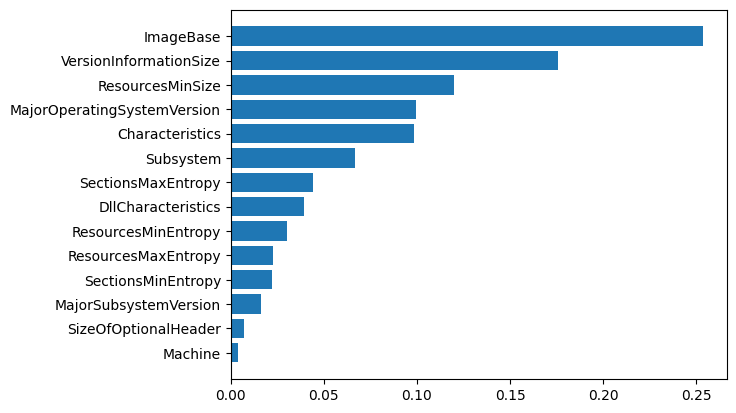

In [23]:
import matplotlib.pyplot as plt

feat_importances = pl.DataFrame({
    "features": X.columns,
    "feature importances": model.feature_importances_,
}).sort("feature importances")

print(feat_importances)

fig, ax = plt.subplots()
ax.barh(feat_importances["features"], feat_importances["feature importances"], align='center')
plt.show()